In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]], columns=['cgpa', 'profile_score', 'placed'])
df

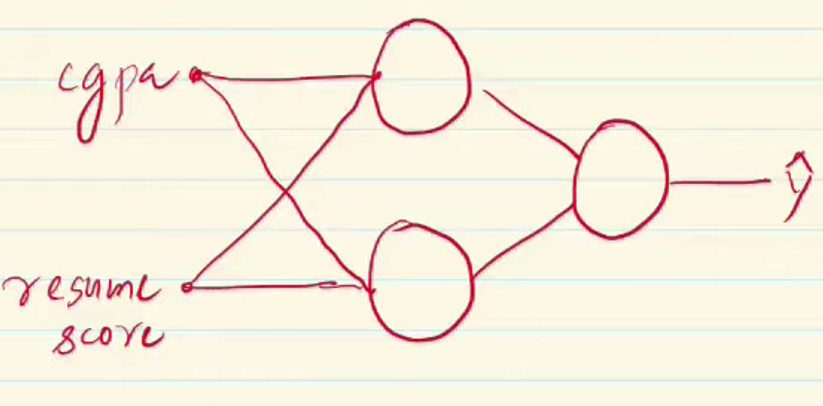

Neural Network Architecture used ⬆️⬆️

In [ ]:
def initialize_parameters(layer_dims):
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)
  for l in range(1, L):
    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
  return parameters


# Utility Functions
def sigmoid(Z):
  A = 1/(1+np.exp(-Z))
  return A


def linear_forward(A_prev, W, b):
  Z = np.dot(W.T, A_prev) + b
  A = sigmoid(Z)
  return A


# L-layer feed forward
def L_layer_forward(X, parameters):
  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)
    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
  return A,A_prev


def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat))
  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))
  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [ ]:
# epochs implementation
parameters = initialize_parameters([2,2,1])
epochs = 50
for i in range(epochs):
  Loss = []
  for j in range(df.shape[0]):
    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['placed']].values[j][0]
    # Parameter initialization
    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]
    update_parameters(parameters,y,y_hat,A1,X)
    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))
  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())
parameters

# I will implement the same using Tensorflow

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

df = pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]], columns=['cgpa', 'profile_score', 'placed'])

model = Sequential()
model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

In [ ]:
model.get_weights()

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=optimizer)
model.fit(df.iloc[:,0:-1].values,df['placed'].values,epochs=50,verbose=1,batch_size=1)

In [ ]:
model.get_weights()